**Model Training for laptop price prediction - Collince Selly**

**Importing the required libraries**

In [39]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
# Reading the dataset

df = pd.read_csv('C:/Users/user/MACHINE_LEARNING/laptop_price_prediction/notebook/data/laptop_price.csv')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [8]:
# Creating the X and Y variables

X = df.drop(columns=['Price (Euro)'], axis=1)
Y = df[['Price (Euro)']]

In [98]:
Y

,Price (Euro)
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60
...,...
1270,638.00
1271,1499.00
1272,229.00
1273,764.00


**Creating a data Trnasformation Pipeline**

**Creating Pipelines with Column Transformers**

In [93]:
# Defining the categorical and numerical columns for all our independent features (X)

cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

In [56]:
# Creating  a function that performs frequency encoding for the categorical features

def frequency_encoding(X, columns):
    # X = X.copy()
    for col in columns:
        frequency_map=X[col].value_counts(normalize=True).to_dict()
        X[col] = X[col].map(frequency_map).fillna(0)
    return X

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,StandardScaler


# Numerical Pipeline

num_pipeline = Pipeline(
                steps = [
                ('imputer',SimpleImputer(strategy='median')),
                ('scaler',StandardScaler())
                ] 
            )

# Categorical Pipeline

cat_pipeline = Pipeline(
                steps = [
                    ('imputer',SimpleImputer(strategy='most_frequent')),
                    ('frequecy_encoder',frequency_encoding(X, columns=cat_features)),
                    ('scaler',StandardScaler())
                ]
            )

preprocessor = ColumnTransformer(
                [
                ('num_pipeline',num_pipeline,num_features),
                ('cat_pipeline',cat_pipeline,cat_features)
                ]
)

In [ ]:
# def frequency_encoding(X, columns):
#     X = X.copy()
#     for col in columns:
#         frequency_map=X[col].value_counts(normalize=True).to_dict()
#         X[col] = X[col].map(frequency_map).fillna(0)
#     return X

In [ ]:
# cat_cols = cat_features
# encoded_data = frequency_encoding(X, cat_cols)

**Train Test Split**

In [59]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

**Transform the data with the pipeline created**

In [60]:
xtrain = pd.DataFrame(preprocessor.fit_transform(xtrain),columns=preprocessor.get_feature_names_out())
xtest = pd.DataFrame(preprocessor.transform(xtest),columns=preprocessor.get_feature_names_out())

In [65]:
preprocessor.get_feature_names_out()

array(['num_pipeline__Company', 'num_pipeline__Product',
       'num_pipeline__TypeName', 'num_pipeline__Inches',
       'num_pipeline__ScreenResolution', 'num_pipeline__CPU_Company',
       'num_pipeline__CPU_Type', 'num_pipeline__CPU_Frequency (GHz)',
       'num_pipeline__RAM (GB)', 'num_pipeline__Memory',
       'num_pipeline__GPU_Company', 'num_pipeline__GPU_Type',
       'num_pipeline__OpSys', 'num_pipeline__Weight (kg)'], dtype=object)

In [66]:
xtrain.head()

,num_pipeline__Company,num_pipeline__Product,num_pipeline__TypeName,num_pipeline__Inches,num_pipeline__ScreenResolution,num_pipeline__CPU_Company,num_pipeline__CPU_Type,num_pipeline__CPU_Frequency (GHz),num_pipeline__RAM (GB),num_pipeline__Memory,num_pipeline__GPU_Company,num_pipeline__GPU_Type,num_pipeline__OpSys,num_pipeline__Weight (kg)
0,-1.301194,-0.406521,-1.295757,-1.194933,-1.347894,0.227032,-0.954051,0.403751,-0.060972,1.393195,0.839939,0.673389,0.467490,-0.651198
1,-2.234434,-0.689674,-0.970693,-0.704288,1.116397,0.227032,0.913145,0.996591,1.513485,-0.618929,-0.684620,-0.659671,0.467490,-0.119813
2,0.715463,-0.406521,-1.295757,0.417185,-1.347894,0.227032,-0.505206,0.008524,-0.848200,1.393195,0.839939,0.673389,0.467490,0.107923
3,0.736917,-0.967274,0.883647,0.417185,1.116397,0.227032,0.661791,0.798977,-0.060972,0.063033,-1.783491,-0.940316,-2.111967,0.259747
4,0.490198,-0.989482,0.883647,0.417185,1.116397,0.227032,-0.271807,-0.584315,-0.848200,0.063033,0.839939,0.673389,0.467490,-0.256455


In [68]:
xtest.head()

,num_pipeline__Company,num_pipeline__Product,num_pipeline__TypeName,num_pipeline__Inches,num_pipeline__ScreenResolution,num_pipeline__CPU_Company,num_pipeline__CPU_Type,num_pipeline__CPU_Frequency (GHz),num_pipeline__RAM (GB),num_pipeline__Memory,num_pipeline__GPU_Company,num_pipeline__GPU_Type,num_pipeline__OpSys,num_pipeline__Weight (kg)
0,0.490198,-0.906202,0.883647,0.417185,-0.197168,0.227032,-1.007913,0.008524,-0.848200,-0.551408,0.839939,0.673389,0.46749,0.062376
1,0.490198,-0.906202,0.883647,0.417185,-0.398002,0.227032,-0.469298,0.206138,-0.060972,0.063033,-0.684620,-0.890201,0.46749,0.107923
2,0.715463,-0.556425,-1.011326,-1.755669,-0.398002,0.227032,0.661791,0.798977,-0.060972,1.393195,0.839939,1.665667,0.46749,-1.015576
3,-1.869719,1.359017,0.883647,-0.704288,-1.510733,0.227032,-0.505206,0.008524,-0.848200,-0.889012,0.839939,0.673389,0.46749,-0.423462
4,0.736917,-1.006138,0.883647,0.417185,-1.570440,0.227032,-0.541114,0.403751,-0.060972,1.393195,-0.684620,-0.479257,0.46749,0.047194


**Model Trainig Baseline Model**

**Create an evaluate function to give all metrics after model training**

In [69]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [70]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(xtrain, ytrain.values.flatten()) # Train model

    # Make predictions
    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(ytrain, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(ytest, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 395.6368
- Mean Absolute Error: 279.1499
- R2 Score: 0.6797
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 411.1265
- Mean Absolute Error: 312.2917
- R2 Score: 0.6595


Lasso
Model performance for Training set
- Root Mean Squared Error: 395.6931
- Mean Absolute Error: 278.9952
- R2 Score: 0.6796
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 410.1914
- Mean Absolute Error: 311.6325
- R2 Score: 0.6610


Ridge
Model performance for Training set
- Root Mean Squared Error: 395.6371
- Mean Absolute Error: 279.1467
- R2 Score: 0.6797
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 411.1032
- Mean Absolute Error: 312.2488
- R2 Score: 0.6595


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 314.0656
- Mean Absolute Error: 198.2448
- R2 Score: 0.

**Results**

In [71]:
df_results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
df_results

,Model Name,R2_Score
7,CatBoosting Regressor,0.887554
6,XGBRegressor,0.836569
5,Random Forest Regressor,0.836366
3,K-Neighbors Regressor,0.685930
1,Lasso,0.661004
2,Ridge,0.659495
0,Linear Regression,0.659457
8,AdaBoost Regressor,0.653256
4,Decision Tree,0.627993


**Hyperparameter tuning**

**Tuning Catboost**

In [75]:
# Initializing catboost
cbr = CatBoostRegressor(verbose=False)

# Creating the hyperparameter grid
param_dist = {'depth'          : [4,5,6,7,8,9,10,12,14,16],
              'learning_rate' : [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09],
               'iterations'    : [300,400,500,600,700,800,900]}

#Instantiate RandomSearchCV object
rscv = RandomizedSearchCV(cbr , param_dist, scoring='r2', cv =5, n_jobs=-1)

# Fit the model
rscv.fit(xtrain, ytrain.values.flatten())

# Print the tuned parameters and score
print(rscv.best_params_)
print(rscv.best_score_)

{'learning_rate': 0.08, 'iterations': 900, 'depth': 5}
0.8201222582509544


**Defining to print evaluated model results**

In [76]:
def print_evaluated_results(model,xtrain,ytrain,xtest,ytest):
    ytrain_pred = model.predict(xtrain)
    ytest_pred = model.predict(xtest)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(ytrain, ytrain_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(ytest, ytest_pred)

    # Printing results
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

In [77]:
# Selecting best model
best_cbr = rscv.best_estimator_

# Evaluate Train and Test dataset
print_evaluated_results(best_cbr,xtrain,ytrain,xtest,ytest)

Model performance for Training set
- Root Mean Squared Error: 92.2404
- Mean Absolute Error: 67.2062
- R2 Score: 0.9826
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 237.2530
- Mean Absolute Error: 163.1785
- R2 Score: 0.8866


**Tuning KNN**

In [82]:
from sklearn.model_selection import GridSearchCV
# Initialize knn
knn = KNeighborsRegressor()

# parameters
k_range = list(range(2, 31))
param_grid = dict(n_neighbors=k_range)

# Fitting the cvmodel
grid = GridSearchCV(knn, param_grid, cv=5, scoring='r2',n_jobs=-1)
grid.fit(xtrain, ytrain)

# Print the tuned parameters and score
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 3}
0.6632024540943852


In [83]:
# Selecting best model
best_knn = grid.best_estimator_

# Evaluate Train and Test dataset
print_evaluated_results(best_knn,xtrain,ytrain,xtest,ytest)

Model performance for Training set
- Root Mean Squared Error: 267.0988
- Mean Absolute Error: 167.3488
- R2 Score: 0.8540
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 408.3857
- Mean Absolute Error: 266.5219
- R2 Score: 0.6640


**Tuning XGBoost**

In [84]:
# Initializing xgboost
xgb = XGBRegressor()

# Parameters
params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ],
 'n_estimators':[300,400,500,600]
}

rs_xgb=RandomizedSearchCV(xgb,param_distributions=params,scoring='r2',n_jobs=-1,cv=5)
rs_xgb.fit(xtrain, ytrain.values.flatten())

# Print the tuned parameters and score
print(rs_xgb.best_params_)
print(rs_xgb.best_score_)

{'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.4}
0.8394595113537753


In [85]:
# Selecting best xgb model
best_xgb = rs_xgb.best_estimator_

# Evaluate Train and Test dataset
print_evaluated_results(best_xgb,xtrain,ytrain,xtest,ytest)

Model performance for Training set
- Root Mean Squared Error: 25.0211
- Mean Absolute Error: 13.2455
- R2 Score: 0.9987
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 219.4183
- Mean Absolute Error: 150.3710
- R2 Score: 0.9030


**Voting Regressor**

In [86]:
from sklearn.ensemble import VotingRegressor

er = VotingRegressor([('cbr',best_cbr),('knn',best_knn),('xgb',XGBRegressor())], weights=[3,1,2])
er.fit(xtrain, ytrain.values.flatten())

print_evaluated_results(er,xtrain,ytrain,xtest,ytest)

Model performance for Training set
- Root Mean Squared Error: 85.9100
- Mean Absolute Error: 61.2829
- R2 Score: 0.9849
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 251.0155
- Mean Absolute Error: 168.6976
- R2 Score: 0.8731


**Model improved with Ensemble techniques**

**Catboost Model Feature Importances**

num_pipeline__RAM (GB)               30.616719
num_pipeline__TypeName               13.992573
num_pipeline__Weight (kg)            10.583388
num_pipeline__CPU_Frequency (GHz)     9.520153
num_pipeline__GPU_Type                5.411341
num_pipeline__ScreenResolution        5.293832
num_pipeline__Memory                  4.634363
num_pipeline__Company                 4.342040
num_pipeline__Product                 4.153122
num_pipeline__OpSys                   3.634866
num_pipeline__Inches                  3.495276
num_pipeline__CPU_Type                2.453114
num_pipeline__CPU_Company             1.028657
num_pipeline__GPU_Company             0.840556
dtype: float64




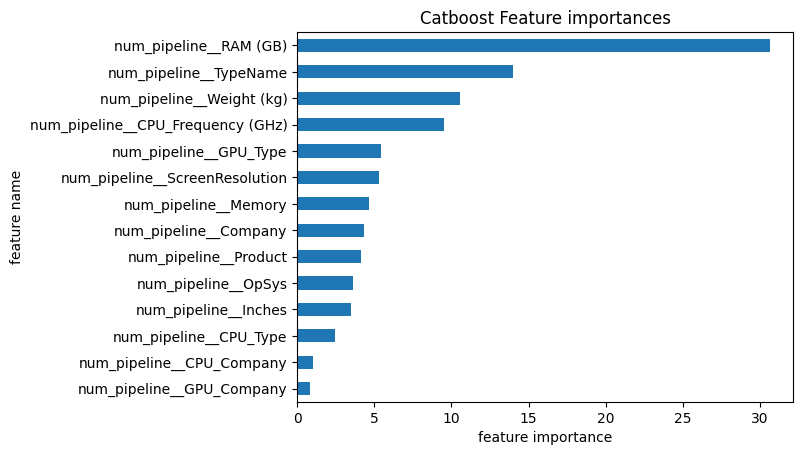

In [87]:
feature_imp = best_cbr.feature_importances_
feature_nm = best_cbr.feature_names_
imp_series = pd.Series(feature_imp)
imp_series.index = feature_nm
print(imp_series.sort_values(ascending=False))
print('\n')
imp_series.sort_values().plot(kind='barh',
                              xlabel='feature importance',
                              ylabel='feature name',
                              title='Catboost Feature importances')
plt.show()